# 예측 애널리틱스: 정규화모델 실습

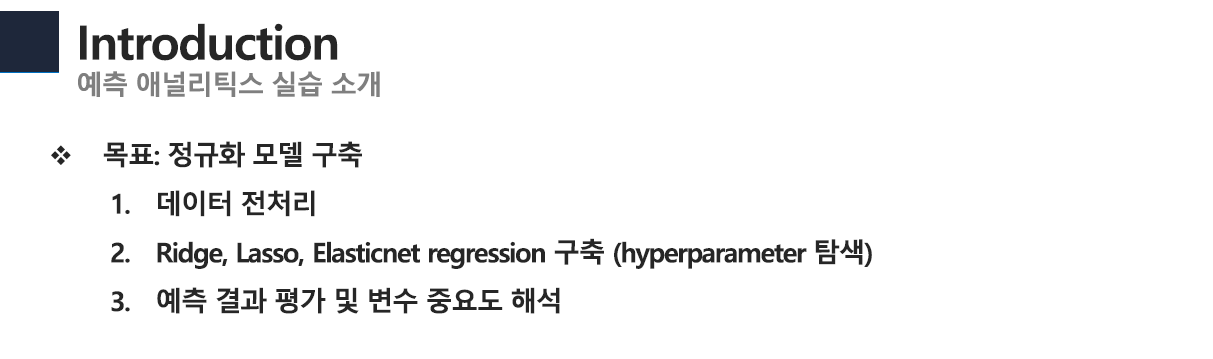

이지윤 / jiyoonlee@korea.ac.kr

## 1. 모듈 불러오기

In [87]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델 및 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [88]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. 탐색적 데이터 분석 및 데이터 전처리

### 데이터 shape 확인

In [89]:
print(f'관측치 수 : {data.shape[0]} \n변수 수 : {data.shape[1]}')

관측치 수 : 1338 
변수 수 : 7


### 결측치, 데이터 타입 확인

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
data[['sex','smoker','region']].value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
                northwest    132
female  no      northeast    132
male    no      southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
male    yes     northwest     29
female  yes     northwest     29
                northeast     29
                southwest     21
dtype: int64

In [93]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [94]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [95]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [96]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [97]:
num_cols = ['age','bmi','children','charges']
cat_cols = ['sex','smoker','region']

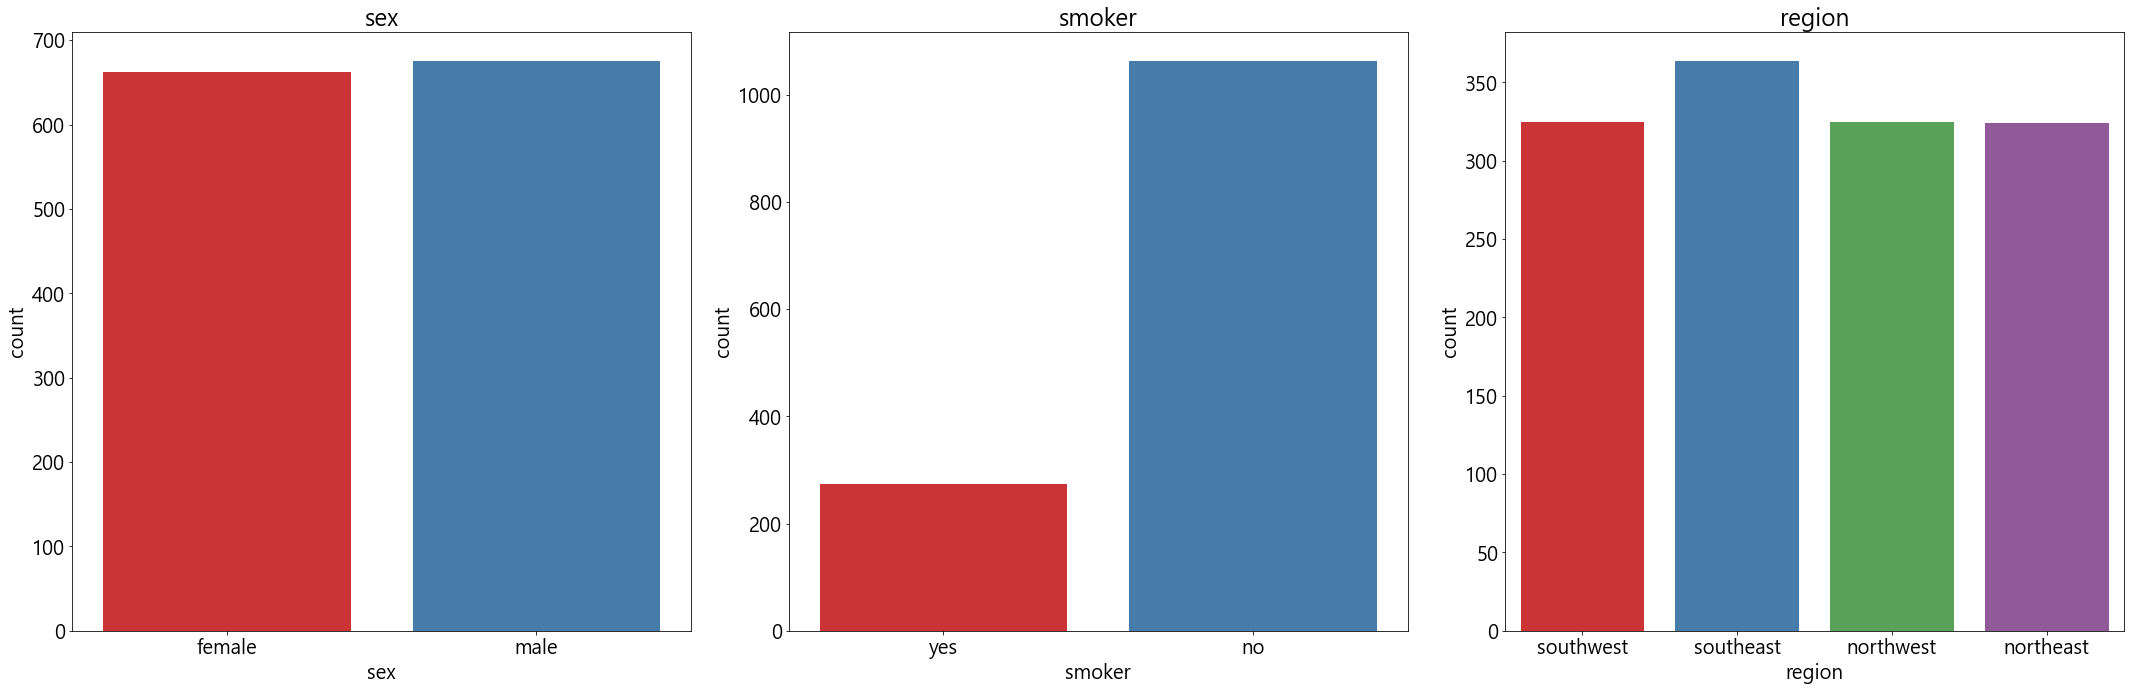

In [99]:
fig = plt.figure(figsize=(30,10))
plt.rc('font', size=20)

for i in range(len(cat_cols)):
    ax = fig.add_subplot(1,3,i+1)
    ax = sns.countplot(data[cat_cols[i]],palette='Set1')
    plt.title(cat_cols[i])
fig.tight_layout()
plt.show()

In [100]:
data[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

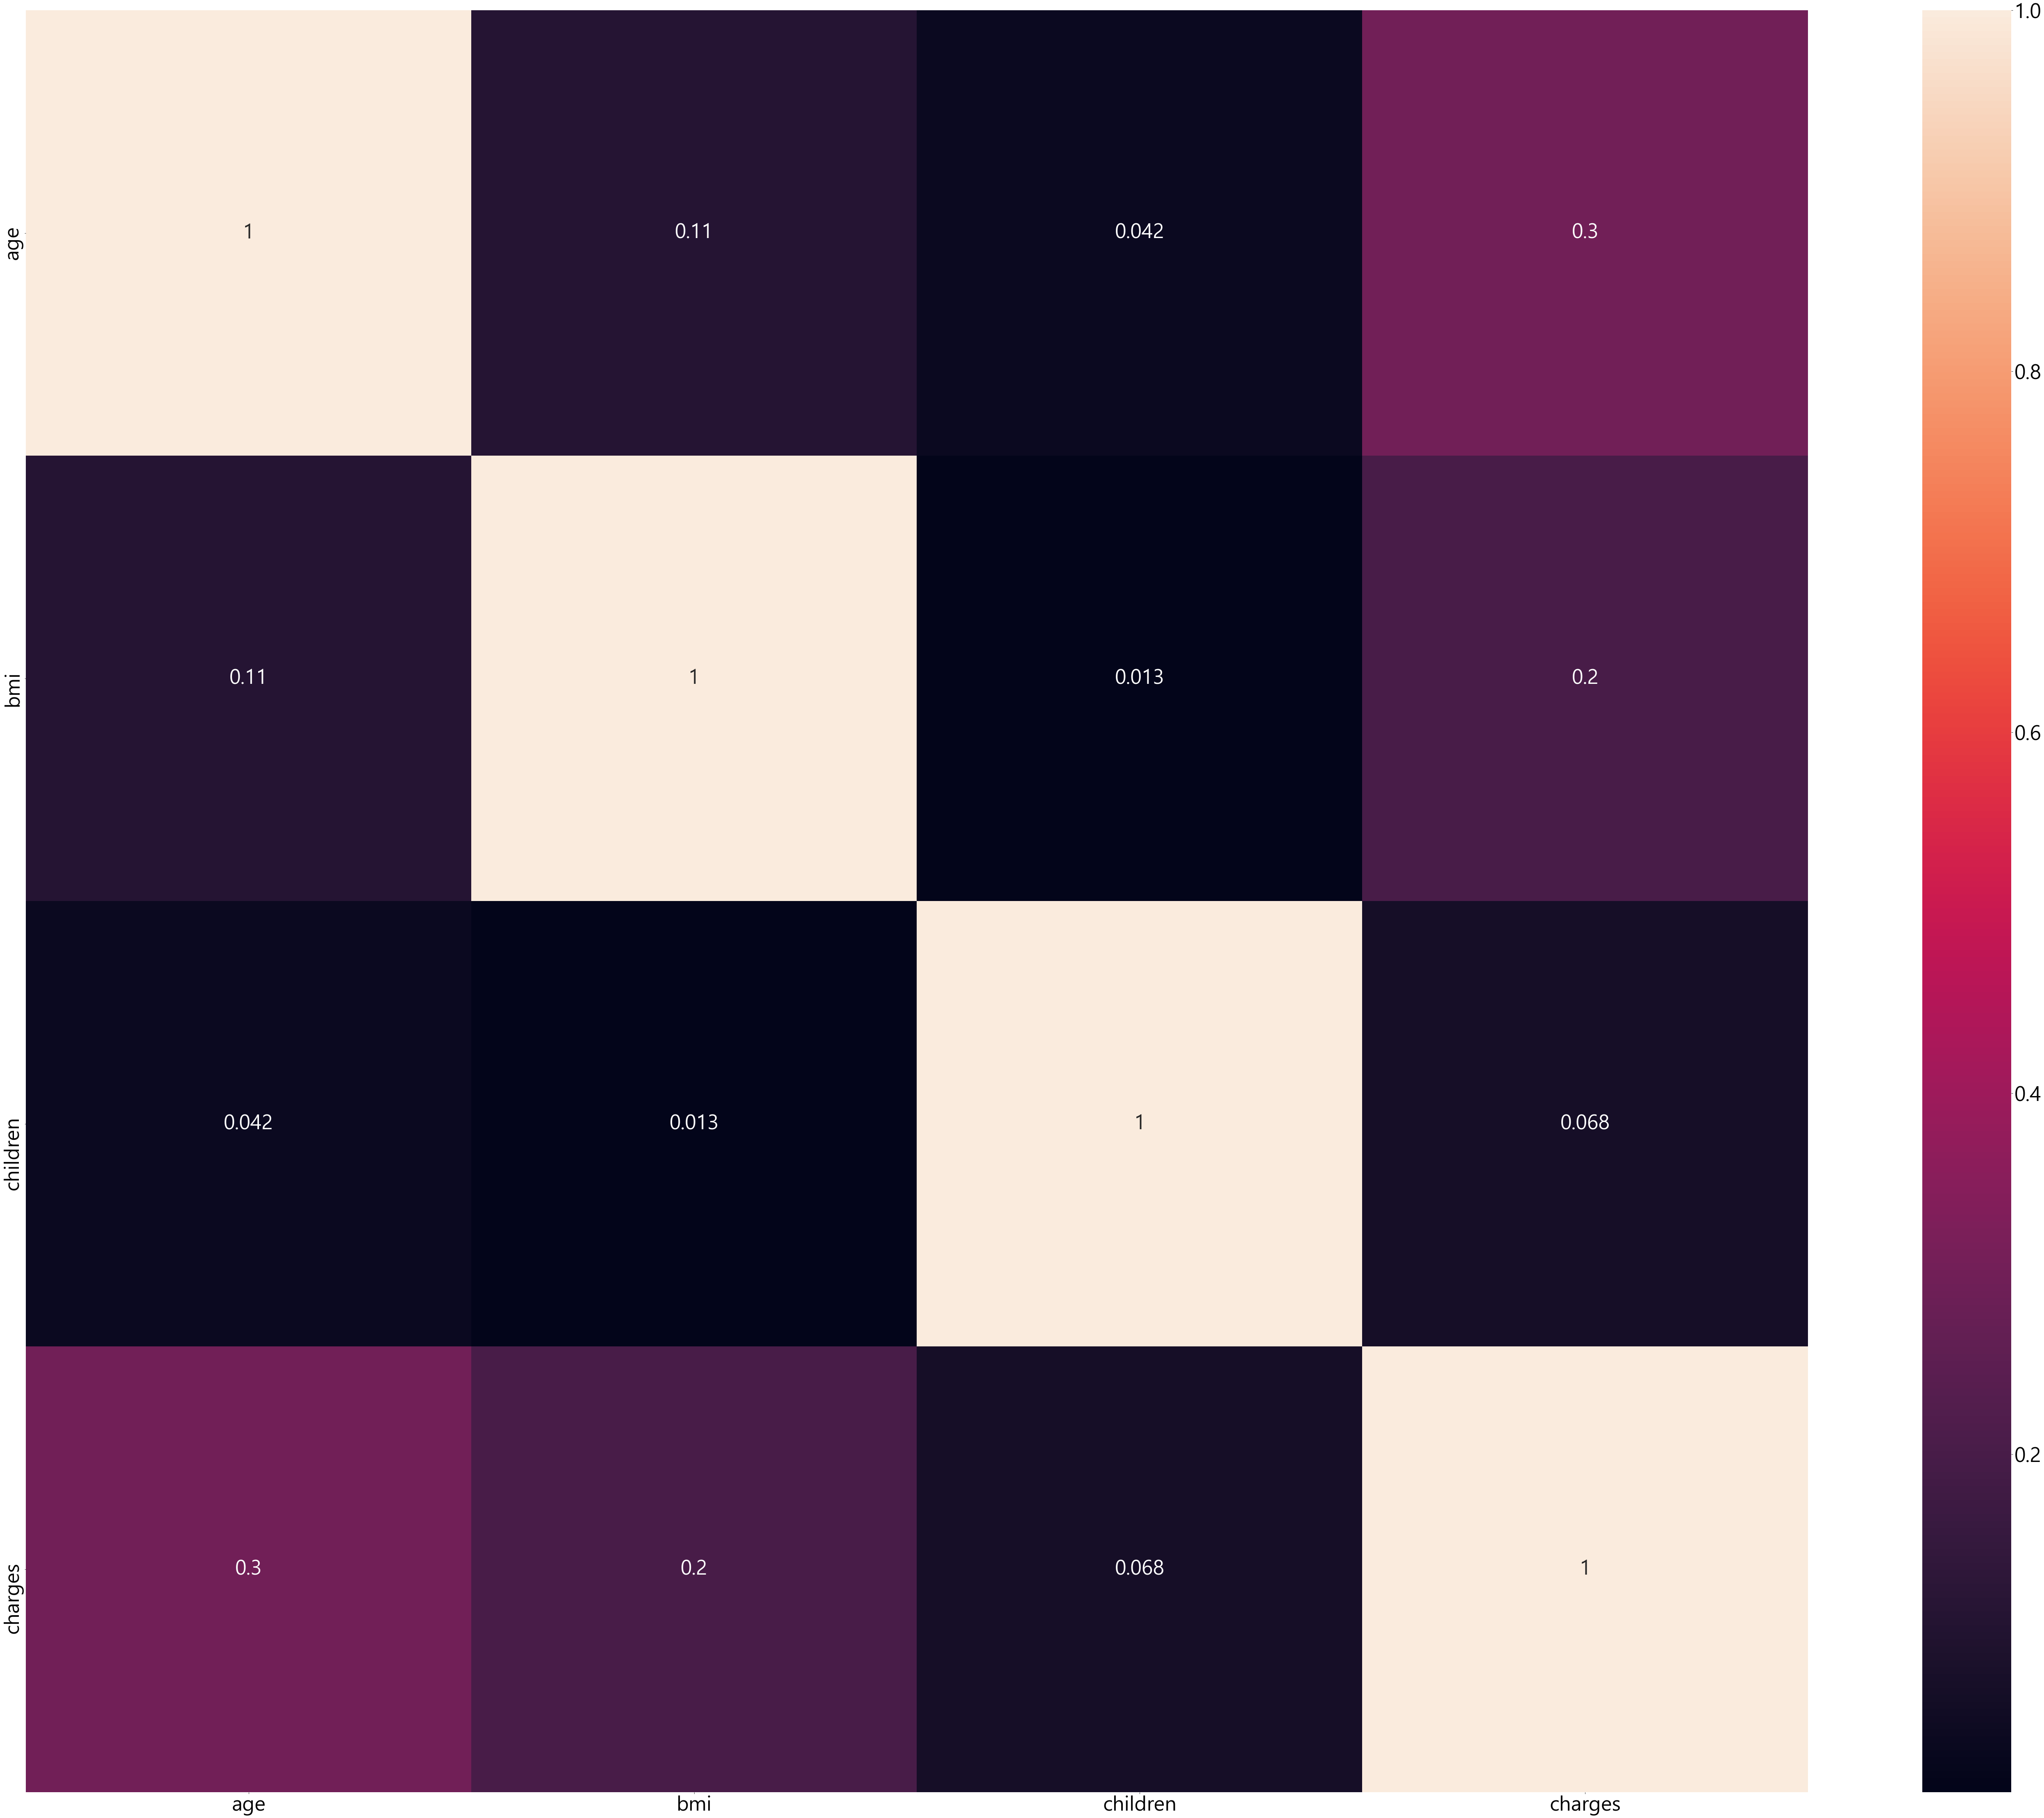

In [101]:
plt.figure(figsize=(100,80))
plt.rc('font', size=50)
sns.heatmap(data[num_cols].corr(),annot=True,square = True)

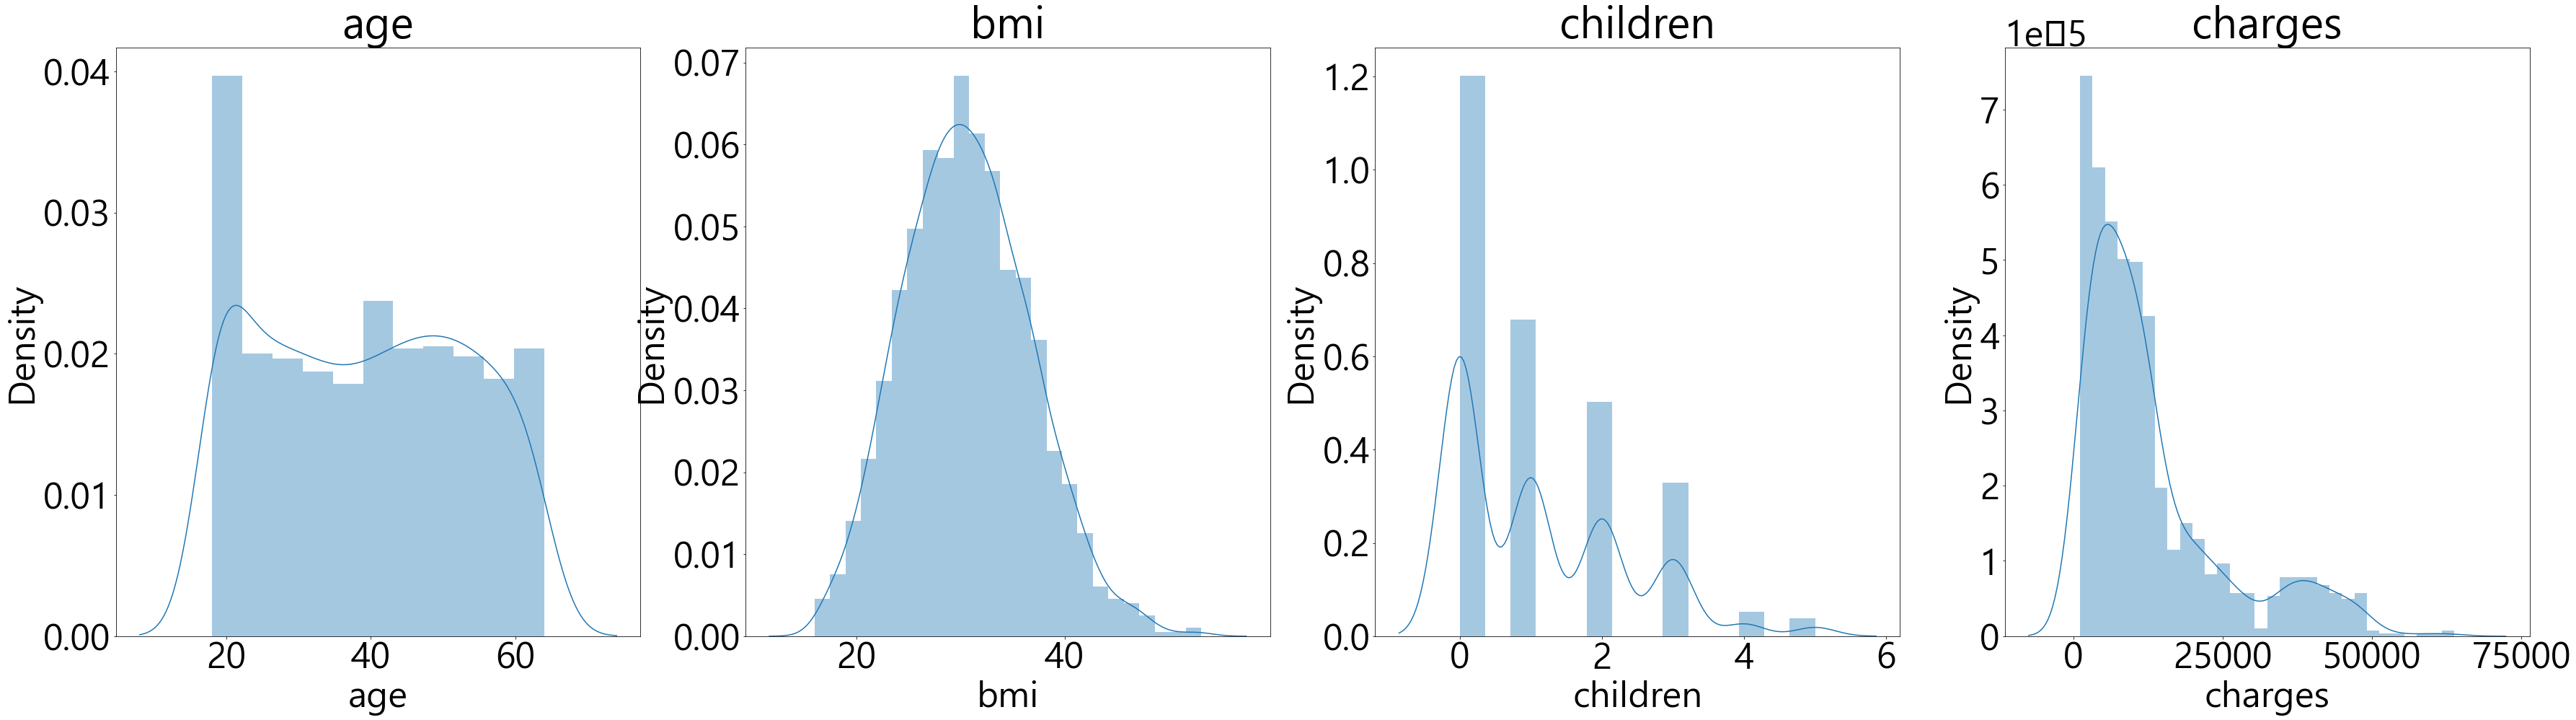

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore' )

fig = plt.figure(figsize=(60,15))
for i in range(len(num_cols)):
    ax = fig.add_subplot(1,4,i+1)
    ax = sns.distplot(data[num_cols[i]])
    plt.title(num_cols[i])

In [106]:
data['sex'] = data['sex'].replace({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [108]:
data = pd.get_dummies(data)
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [109]:
X = data.drop('charges', axis=1)
y = data['charges']

display(X.head(3))

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,0,0,0,1
1,18,1,33.77,1,0,0,0,1,0
2,28,1,33.00,3,0,0,0,1,0


- Training 데이터 70% / Testing 데이터 30% 나누기

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2021)

In [111]:
scaler = StandardScaler()
scaler.fit(X_train[['age','bmi','children']])

StandardScaler()

In [112]:
X_train[['age','bmi','children']] = scaler.transform(X_train[['age','bmi','children']])

In [113]:
X_train_final = X_train
X_train_final.tail()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
44,-0.093435,1,1.025080,-0.084159,0,1,0,0,0
621,-0.165296,1,0.548170,2.377499,1,0,0,0,1
1152,0.265870,0,0.299207,1.556946,1,0,0,1,0
57,-1.530655,1,0.156942,0.736393,1,0,0,1,0
1140,0.768898,1,1.028313,-0.084159,0,0,0,1,0


In [114]:
X_test[['age','bmi','children']] = scaler.transform(X_test[['age','bmi','children']])
X_test_final = X_test
X_test_final.tail()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
612,-1.530655,0,0.395397,-0.904712,0,1,0,0,0
55,1.343786,1,1.009722,0.736393,1,0,1,0,0
961,-0.740184,0,-0.777478,-0.904712,0,0,0,0,1
980,1.056342,1,-0.848610,-0.084159,0,1,0,0,0
137,-1.243211,1,-0.894684,-0.904712,0,0,1,0,0


In [115]:
X_train, y_train = X_train_final.values, y_train.values
X_test, y_test = X_test_final.values, y_test.values

In [116]:
model_LR = LinearRegression(n_jobs=-1)
model_LR.fit(X_train, y_train)
display(pd.DataFrame(model_LR.coef_,
                     index=X_test_final.columns, columns=['Linear regression 계수']))

,Linear regression 계수
age,3295.289166
sex,-218.935391
bmi,2274.708570
children,820.574873
smoker,23815.316291
region_northeast,745.992405
region_northwest,375.015932
region_southeast,-927.085286
region_southwest,-193.923050


In [117]:
model_Lasso1 = Lasso(alpha=0.0001,random_state=1)
model_Lasso2 = Lasso(alpha=0.001,random_state=1)
model_Lasso3 = Lasso(alpha=0.01,random_state=1)
model_Lasso4 = Lasso(alpha=0.1,random_state=1)
model_Lasso5 = Lasso(alpha=1,random_state=1)
model_Lasso6 = Lasso(alpha=10.0,random_state=1)
model_Lasso7 = Lasso(alpha=100.0,random_state=1)


model_Ridge1 = Ridge(alpha=0.0001,random_state=1)
model_Ridge2 = Ridge(alpha=0.001,random_state=1)
model_Ridge3 = Ridge(alpha=0.01,random_state=1)
model_Ridge4 = Ridge(alpha=0.1,random_state=1)
model_Ridge5 = Ridge(alpha=1,random_state=1)
model_Ridge6 = Ridge(alpha=10.0,random_state=1)
model_Ridge7 = Ridge(alpha=100.0,random_state=1)

model_ElasticNet1 = ElasticNet(alpha=0.0001,random_state=1)
model_ElasticNet2 = ElasticNet(alpha=0.001,random_state=1)
model_ElasticNet3 = ElasticNet(alpha=0.01,random_state=1)
model_ElasticNet4 = ElasticNet(alpha=0.1,random_state=1)
model_ElasticNet5 = ElasticNet(alpha=1.0,random_state=1)
model_ElasticNet6 = ElasticNet(alpha=10.0,random_state=1)
model_ElasticNet7 = ElasticNet(alpha=100.0,random_state=1)

model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Lasso3.fit(X_train, y_train)
model_Lasso4.fit(X_train, y_train)
model_Lasso5.fit(X_train, y_train)
model_Lasso6.fit(X_train, y_train)
model_Lasso7.fit(X_train, y_train)


model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)
model_Ridge3.fit(X_train, y_train)
model_Ridge4.fit(X_train, y_train)
model_Ridge5.fit(X_train, y_train)
model_Ridge6.fit(X_train, y_train)
model_Ridge7.fit(X_train, y_train)

model_ElasticNet1.fit(X_train, y_train)
model_ElasticNet2.fit(X_train, y_train)
model_ElasticNet3.fit(X_train, y_train)
model_ElasticNet4.fit(X_train, y_train)
model_ElasticNet5.fit(X_train, y_train)
model_ElasticNet6.fit(X_train, y_train)
model_ElasticNet7.fit(X_train, y_train)

ElasticNet(alpha=100.0, random_state=1)

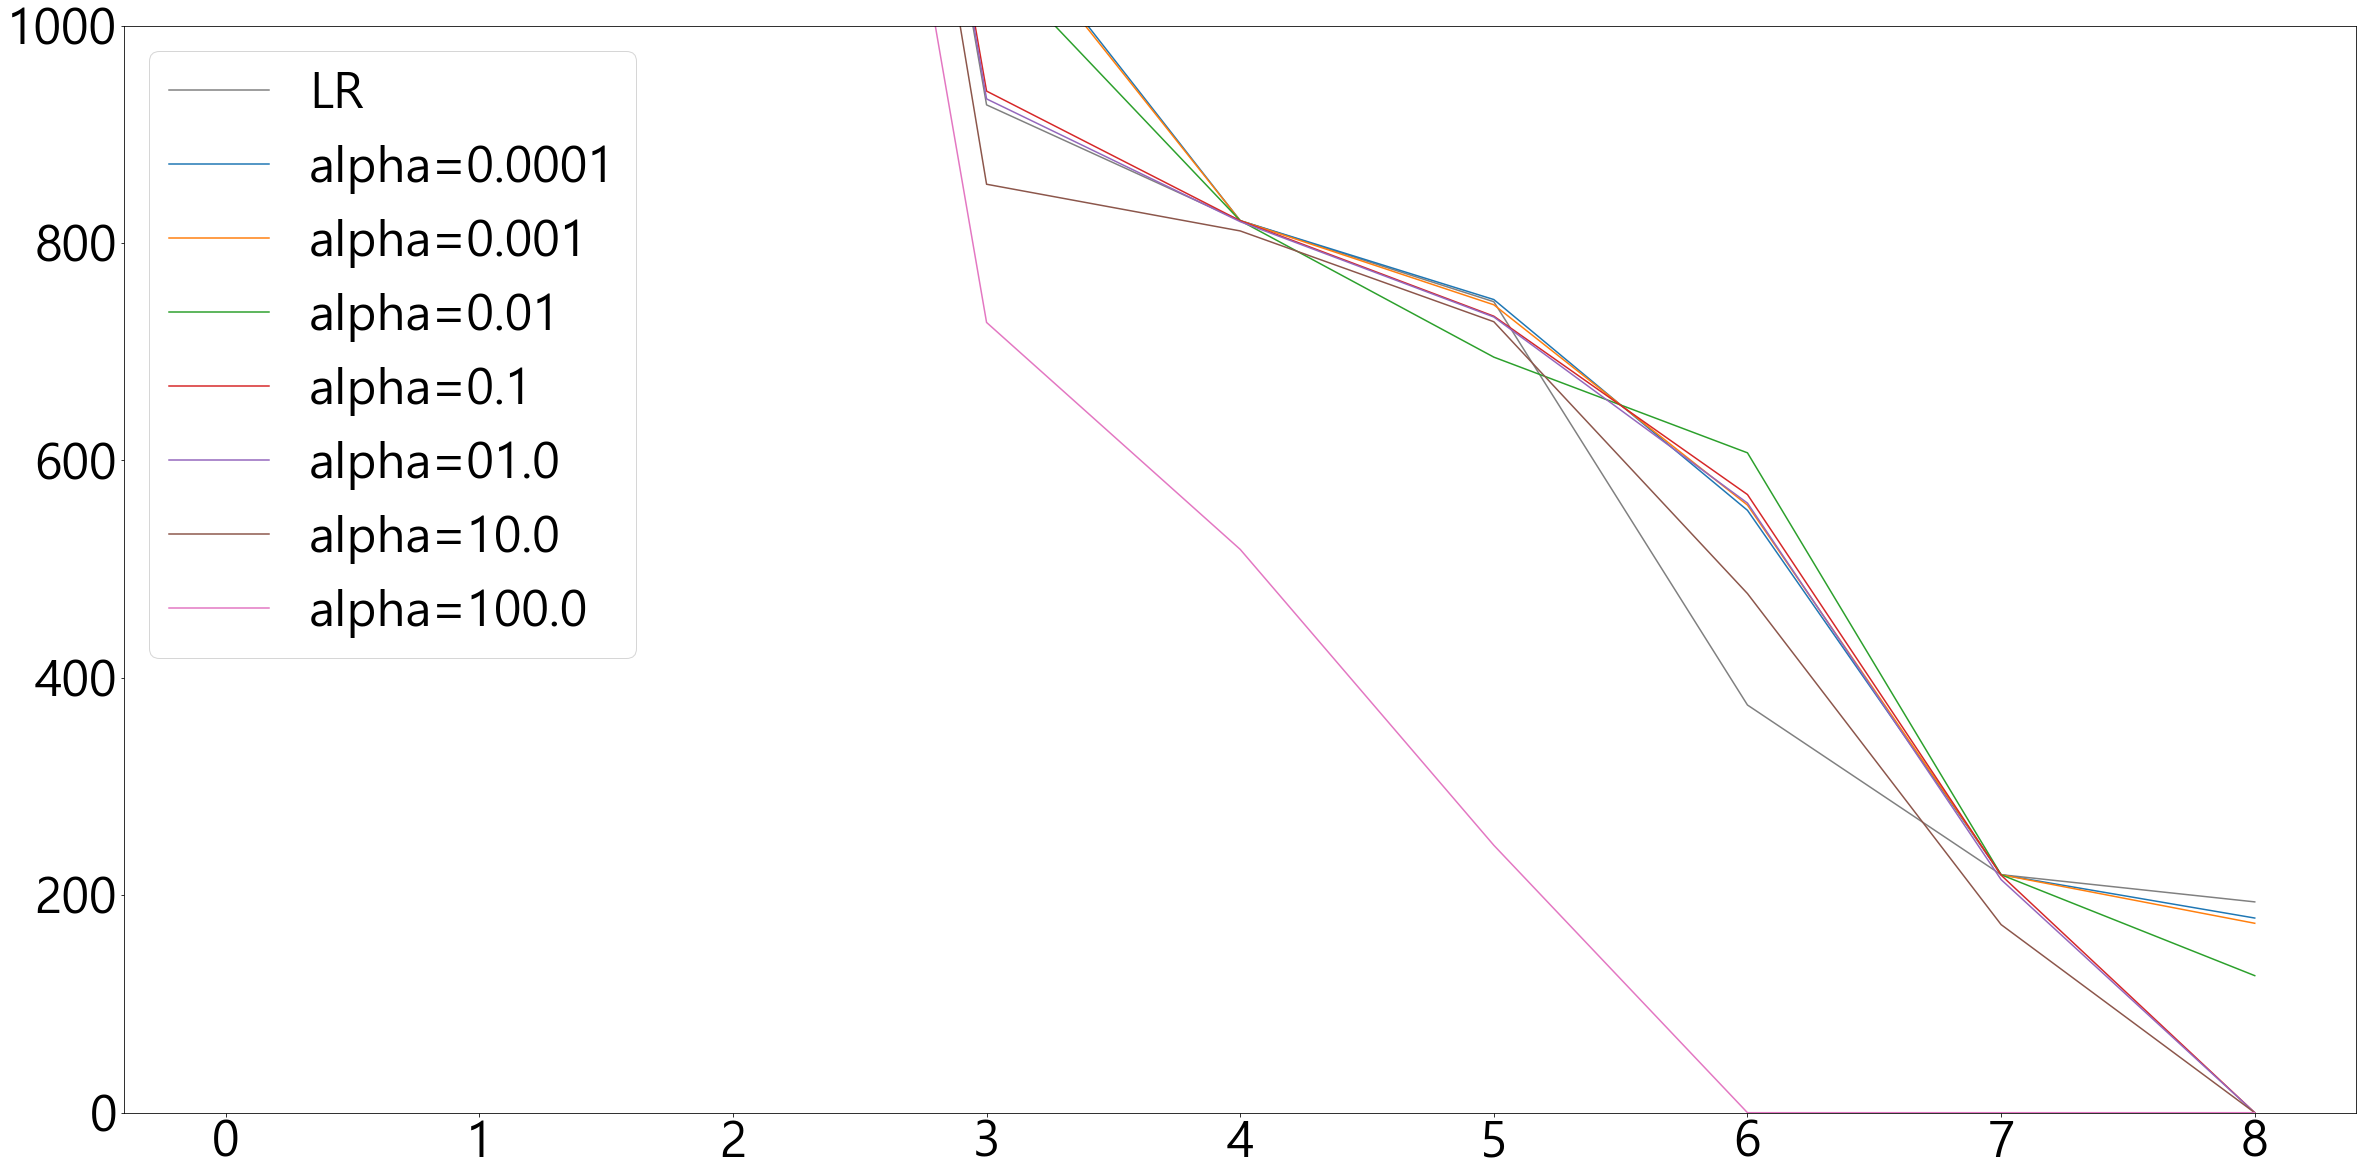

In [122]:
plt.figure(figsize=(40,20))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label='LR', c='gray')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label='alpha=0.0001')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label='alpha=0.001')
plt.plot(sorted(np.abs(model_Lasso3.coef_))[::-1], label='alpha=0.01')
plt.plot(sorted(np.abs(model_Lasso4.coef_))[::-1], label='alpha=0.1')
plt.plot(sorted(np.abs(model_Lasso5.coef_))[::-1], label='alpha=01.0')
plt.plot(sorted(np.abs(model_Lasso6.coef_))[::-1], label='alpha=10.0')
plt.plot(sorted(np.abs(model_Lasso7.coef_))[::-1], label='alpha=100.0')
plt.legend()
plt.ylim((-0.1,1000)) # 50000
plt.show()

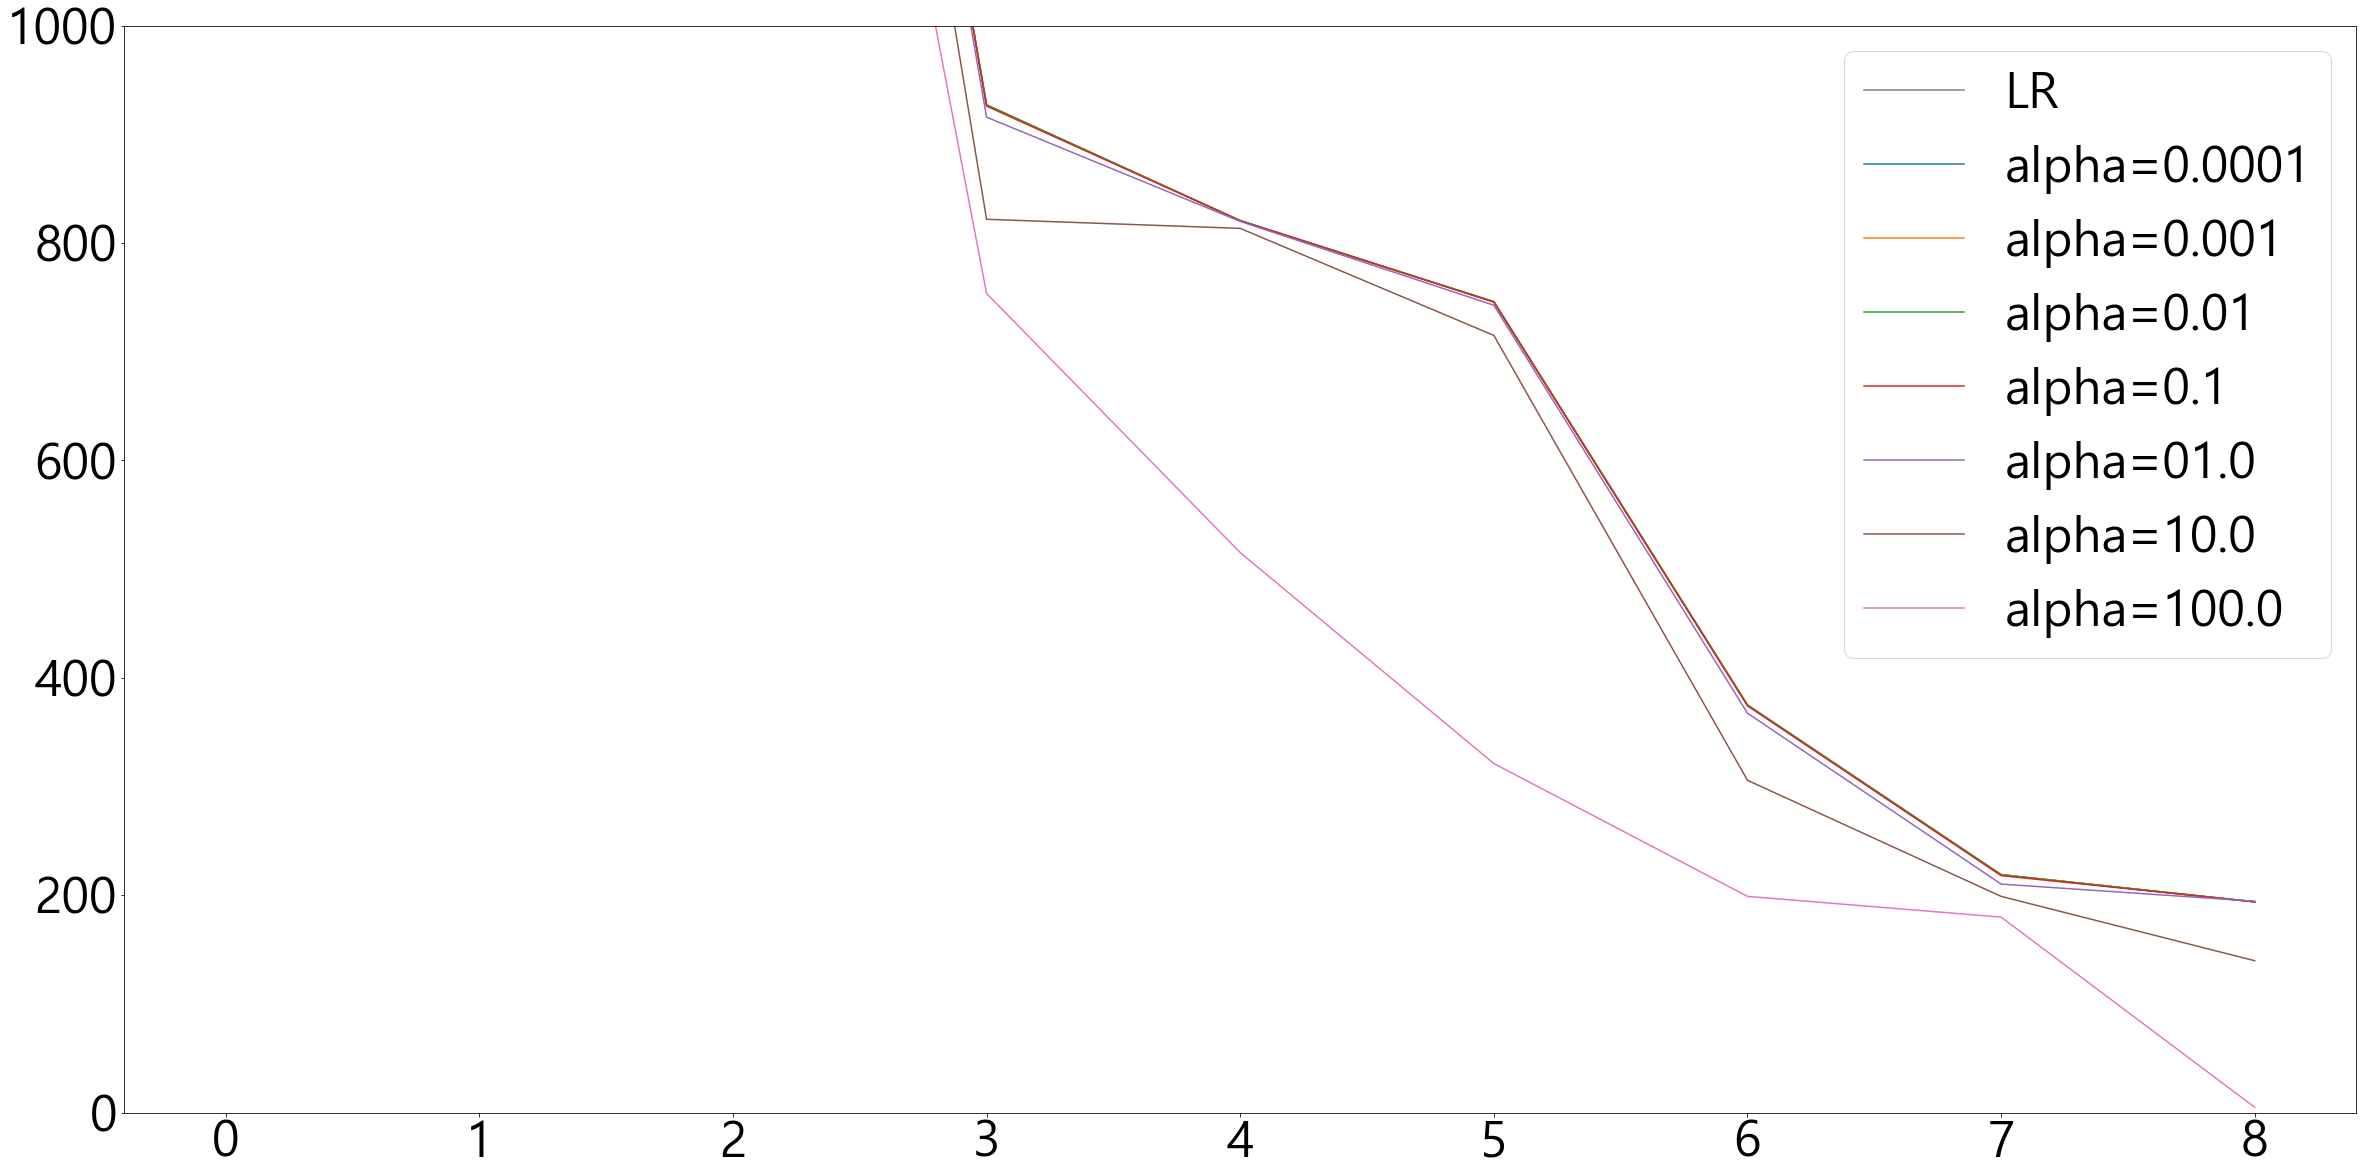

In [35]:
plt.figure(figsize=(40,20))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label='LR', c='gray')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label='alpha=0.0001')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label='alpha=0.001')
plt.plot(sorted(np.abs(model_Ridge3.coef_))[::-1], label='alpha=0.01')
plt.plot(sorted(np.abs(model_Ridge4.coef_))[::-1], label='alpha=0.1')
plt.plot(sorted(np.abs(model_Ridge5.coef_))[::-1], label='alpha=01.0')
plt.plot(sorted(np.abs(model_Ridge6.coef_))[::-1], label='alpha=10.0')
plt.plot(sorted(np.abs(model_Ridge7.coef_))[::-1], label='alpha=100.0')
plt.legend()
plt.ylim((-0.1,1000)) # 50000
plt.show()

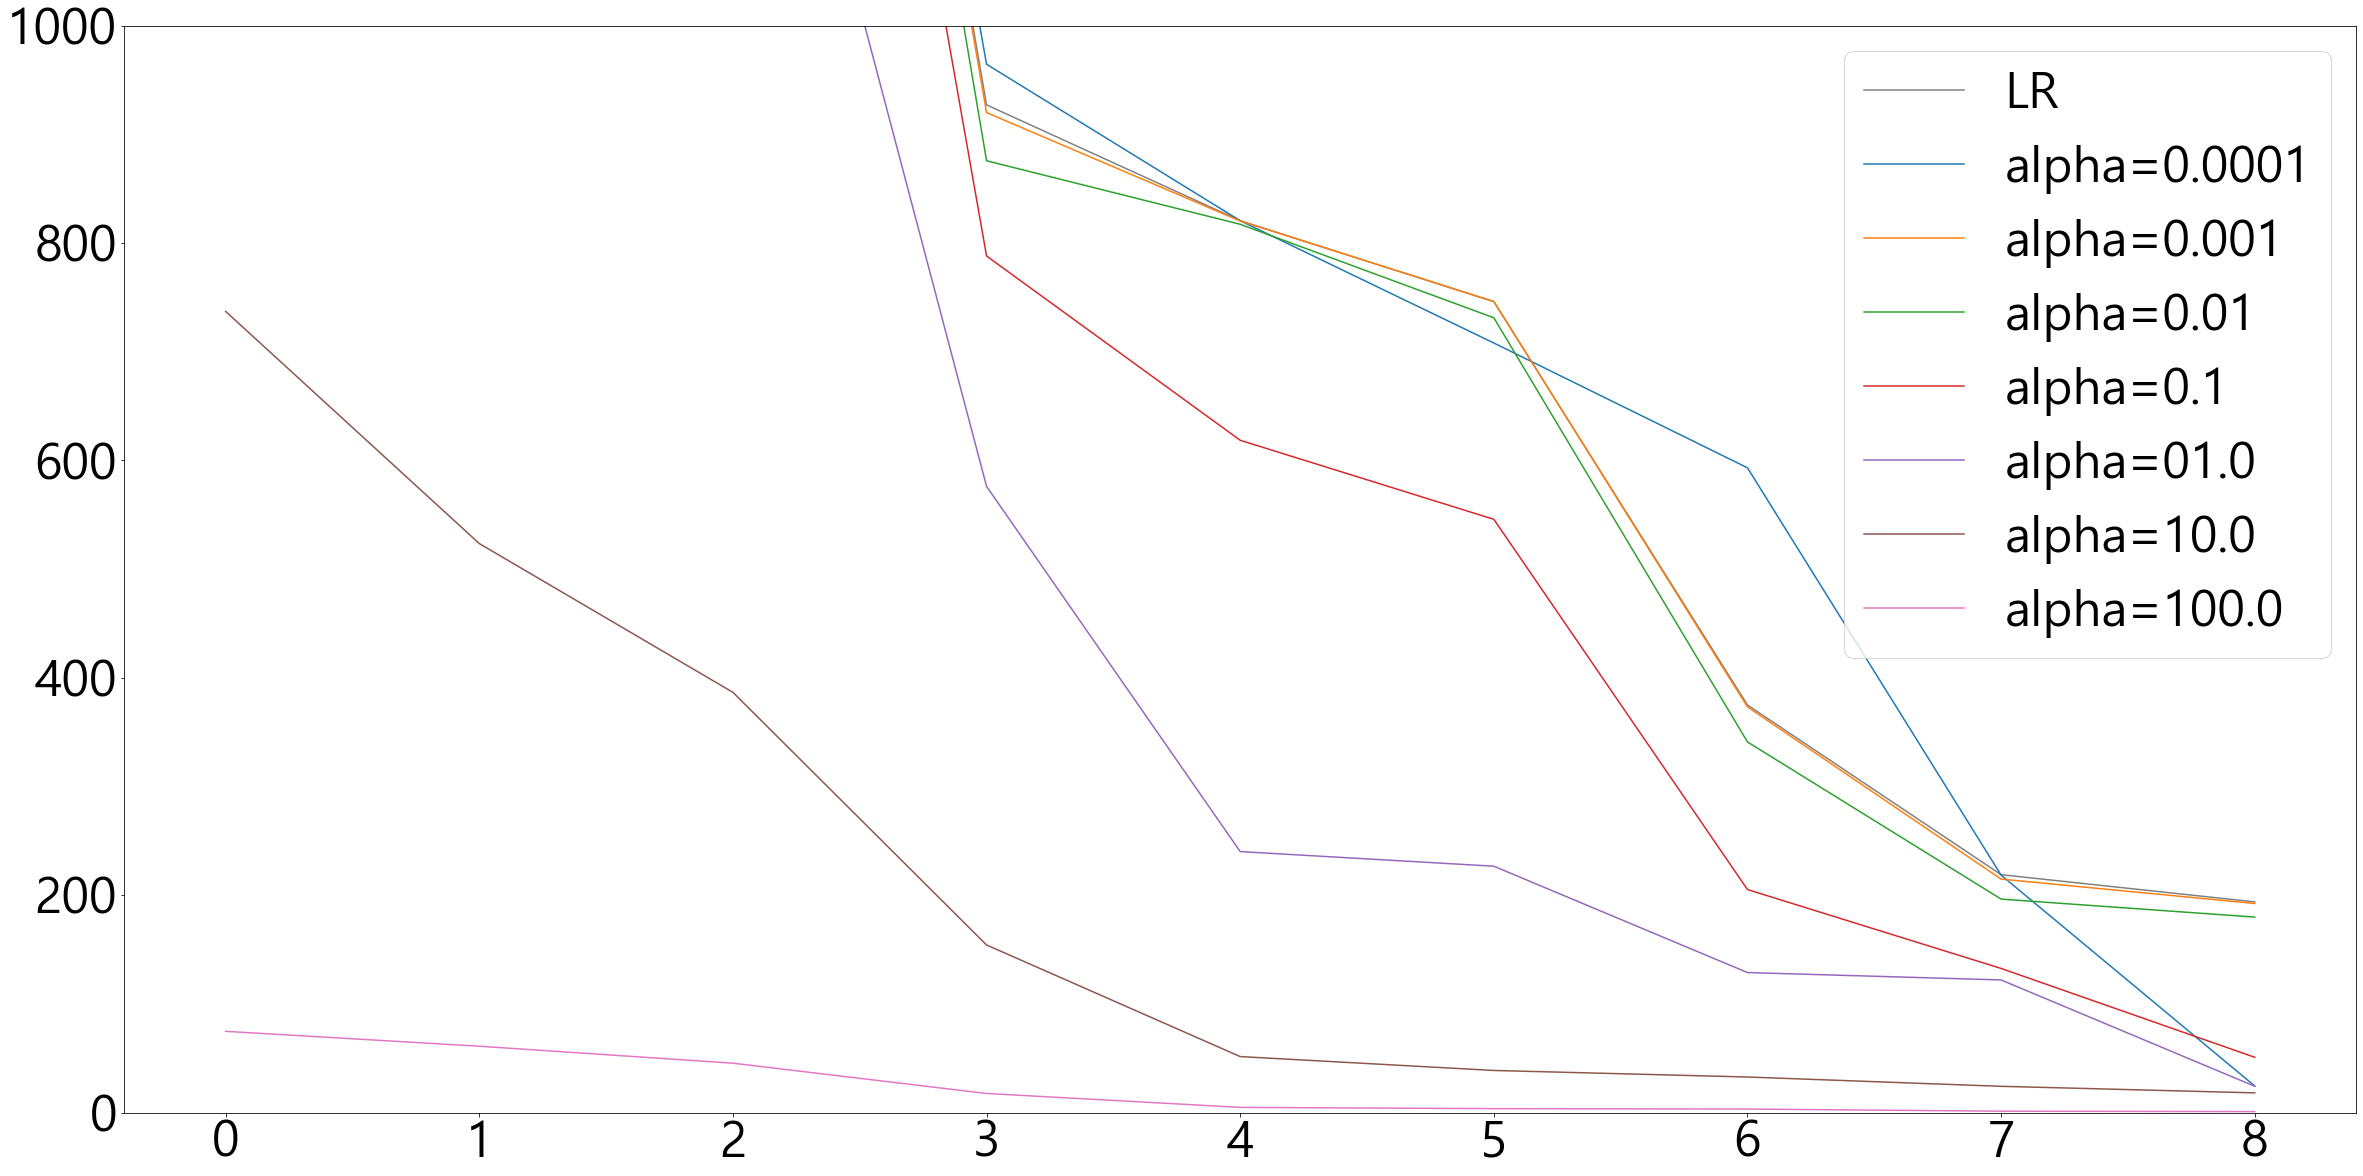

In [36]:
plt.figure(figsize=(40,20))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label='LR', c='gray')
plt.plot(sorted(np.abs(model_ElasticNet1.coef_))[::-1], label='alpha=0.0001')
plt.plot(sorted(np.abs(model_ElasticNet2.coef_))[::-1], label='alpha=0.001')
plt.plot(sorted(np.abs(model_ElasticNet3.coef_))[::-1], label='alpha=0.01')
plt.plot(sorted(np.abs(model_ElasticNet4.coef_))[::-1], label='alpha=0.1')
plt.plot(sorted(np.abs(model_ElasticNet5.coef_))[::-1], label='alpha=01.0')
plt.plot(sorted(np.abs(model_ElasticNet6.coef_))[::-1], label='alpha=10.0')
plt.plot(sorted(np.abs(model_ElasticNet7.coef_))[::-1], label='alpha=100.0')
plt.legend()
plt.ylim((-0.1,1000)) # 50000
plt.show()

### 3.3 k fold cross validation(K폴드 교차검증)으로 하이퍼 파라미터 찾기 + 모델 비교 선택

In [141]:
# dict with optimal models
models = {} # dict()

# find optimal value of alpha 
n_trials = 20
alpha_list = 10 ** np.linspace(-3, 3, n_trials)

# number of folds for cross validation
cv = 5

# find optimal value of l1 (for ElasticNet)        
alpha_list = [0.001,0.0005,0.01,0.05,0.1,1,10,20,30,40,50,100]
l1_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

max_iter = 10000

In [142]:
# find optimal Lasso model
model = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=1, max_iter=max_iter)
model.fit(X_train, y_train)
print(model.alpha_,max_iter)
models['Lasso'] = Lasso(alpha=model.alpha_, max_iter=max_iter)

10.0 10000


In [143]:
# find optimal Ridge model
model = RidgeCV(alphas=alpha_list, cv=cv)
model.fit(X_train, y_train)
print(model.alpha_,max_iter)
models['Ridge'] = Ridge(alpha=model.alpha_)

0.0005 10000


In [144]:
# find optimal ElasticNet model
model = ElasticNetCV(alphas=alpha_list, l1_ratio=l1_list,
                   cv=cv, random_state=1, n_jobs=-1, max_iter=max_iter)
model.fit(X_train, y_train)
print(model.alpha_,model.l1_ratio_,max_iter)
models['ElasticNet'] = ElasticNet(alpha=model.alpha_, l1_ratio=model.l1_ratio_, max_iter=max_iter)

0.0005 0.9 10000


In [145]:
for name in models.keys():
    print(models[name])
    print('-'*100)

Lasso(alpha=10.0, max_iter=10000)
----------------------------------------------------------------------------------------------------
Ridge(alpha=0.0005)
----------------------------------------------------------------------------------------------------
ElasticNet(alpha=0.0005, l1_ratio=0.9, max_iter=10000)
----------------------------------------------------------------------------------------------------


### 모델 비교 선택

In [48]:
kf = KFold(cv, shuffle=True, random_state=1)
kf

KFold(n_splits=5, random_state=1, shuffle=True)

In [49]:
score = {}
for name in models.keys():
    # save score for each model
    if name not in score:
        score[name] = []

    # 모델
    reg = models[name]
    for i_train, i_valid in kf.split(X_train):
        # 학습
        reg.fit(X_train[i_train], y_train[i_train])
        # 예측
        y_pred = reg.predict(X_train[i_valid])
        RMSE = np.sqrt(mean_squared_error(y_train[i_valid], y_pred))
        score[name].append(RMSE)

In [50]:
score

{'Lasso': [5932.32540473964,
  6473.596533865605,
  6000.994526302922,
  5472.796641180275,
  6699.0327869381],
 'Ridge': [5932.277277126579,
  6474.899849233428,
  6006.638561886355,
  5471.201294437788,
  6702.0721868572755],
 'ElasticNet': [6062.90421679579,
  6534.980055286242,
  5915.981185846904,
  5461.19215365431,
  6710.869386339412]}

In [51]:
results = pd.DataFrame(score)
results

,Lasso,Ridge,ElasticNet
0,5932.325405,5932.277277,6062.904217
1,6473.596534,6474.899849,6534.980055
2,6000.994526,6006.638562,5915.981186
3,5472.796641,5471.201294,5461.192154
4,6699.032787,6702.072187,6710.869386


,mean,std
Lasso,6115.749179,481.787135
Ridge,6117.417834,483.156029
ElasticNet,6137.185400,499.692348


<Figure size 7200x7200 with 0 Axes>

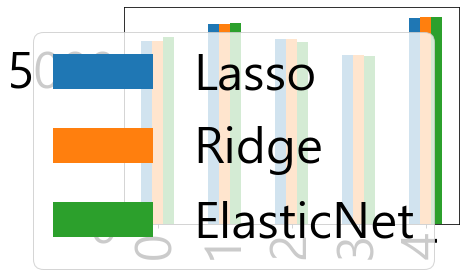

In [62]:
plt.figure(figsize=(100,100))
ax = results.plot.bar()

pd.concat([results.mean(), results.std()], axis=1, keys=['mean', 'std'])

### 3.4 최종 모델 학습, 결과 출력, 성능확인

In [75]:
model = models['Lasso'].fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [76]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print(f'train rmse : {rmse_train:.4f}')
print(f'test rmse : {rmse_test:.4f}')

train rmse : 6032.7033
test rmse : 6116.7382


In [77]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f'train r2 : {r2_train:.4f}')
print(f'test r2 : {r2_test:.4f}')

train r2 : 0.7461
test r2 : 0.7570


In [78]:
model.coef_

array([ 3286.97049972,  -173.01803025,  2253.14101301,   811.11976047,
       23745.21364392,   854.07093397,   477.52324633,  -727.58870495,
          -0.        ])

In [79]:
model = models['Ridge'].fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [80]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print(f'train rmse : {rmse_train:.4f}')
print(f'test rmse : {rmse_test:.4f}')

train rmse : 6032.4276
test rmse : 6120.4814


In [81]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f'train r2 : {r2_train:.4f}')
print(f'test r2 : {r2_test:.4f}')

train r2 : 0.7462
test r2 : 0.7567


In [82]:
model.coef_

array([ 3294.75571519,  -218.06377442,  2274.27906778,   820.50356349,
       23799.43642359,   745.67101435,   374.25842727,  -925.94570485,
        -193.98373676])

In [83]:
model = models['ElasticNet'].fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print(f'train rmse : {rmse_train:.4f}')
print(f'test rmse : {rmse_test:.4f}')

train rmse : 6058.7131
test rmse : 6151.0690


In [85]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f'train r2 : {r2_train:.4f}')
print(f'test r2 : {r2_test:.4f}')

train r2 : 0.7439
test r2 : 0.7542


In [86]:
model.coef_

array([ 3246.79786184,  -144.01696402,  2236.14498273,   813.8468396 ,
       22415.01851592,   716.88637572,   309.73700877,  -827.35142785,
        -198.04427238])

#### 예측 결과 plotting

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력값',fontsize=16)
plt.scatter(y_train, pred_train, c='red', alpha=0.5) # alpha 투명도 0일수록 투명
plt.scatter(y_test, pred_test, c='blue', alpha=0.5)
plt.plot(y_test,y_test, c='gray')
plt.plot(y_train,y_train, c='gray')
plt.xlabel('실제값', size=10)
plt.ylabel('모델 출력 값', size=10)
plt.show()

#### 계수값을 변수 중요도로 생각하기

In [ ]:
model = models['ElasticNet'].fit(X_train, y_train)

coef_df = pd.DataFrame(model.coef_.reshape(-1,1), index=X_test_final.columns, columns=['coefficients'])
coef_df.to_csv('coef.csv')
coef_df

In [ ]:
# Sort: descending order
coefficents = np.abs(coef_df.coefficients)
index = np.argsort(coefficents)[::-1]
print(index)

In [ ]:
importance =  coefficents[index]
columns = [list(coef_df.index)[i] for i in index]

In [ ]:
importance = importance[importance > 0]

In [ ]:
num_print = 20

plt.figure(figsize=(10,3))
plt.title('Feature Importances = ABS(coefficients)')
plt.bar(range(num_print),
        importance[:num_print],
        align='center')
plt.xticks(range(num_print), columns[:num_print], rotation=90, fontsize=11)
plt.show()

EOD